In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = os.path.join(os.getcwd(), 'cv2.txt')
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
print(data.head())

   Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900


In [3]:
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [4]:
#Normalizování čísel, jelikož kvůli velkým rozdílům ve velikosti čísel, aby proběhlo zohlednění malých čísel(počet místností) v modelu
data = (data - data.mean())/data.std()
print(data.head)

<bound method NDFrame.head of         Size  Bedrooms     Price
0   0.130010 -0.223675  0.475747
1  -0.504190 -0.223675 -0.084074
2   0.502476 -0.223675  0.228626
3  -0.735723 -1.537767 -0.867025
4   1.257476  1.090417  1.595389
5  -0.019732  1.090417 -0.323998
6  -0.587240 -0.223675 -0.204036
7  -0.721881 -0.223675 -1.130948
8  -0.781023 -0.223675 -1.026973
9  -0.637573 -0.223675 -0.783051
10 -0.076357  1.090417 -0.803053
11 -0.000857 -0.223675  0.052682
12 -0.139273 -0.223675 -0.083283
13  3.117292  2.404508  2.874981
14 -0.921956 -0.223675 -0.643896
15  0.376643  1.090417  0.875619
16 -0.856523 -1.537767 -0.323998
17 -0.962223 -0.223675 -1.123743
18  0.765468  1.090417  1.276275
19  1.296484  1.090417  2.068039
20 -0.294048 -0.223675 -0.699878
21 -0.141790 -1.537767 -0.683083
22 -0.499157 -0.223675 -0.779852
23 -0.048673  1.090417 -0.643896
24  2.377392 -0.223675  1.867303
25 -1.133356 -0.223675 -0.723870
26 -0.682873 -0.223675  0.992382
27  0.661026 -0.223675  1.028370
28  0.250810 

In [5]:
#upravený gradient descent tak aby pracoval s dvěmi proměnnými
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y #maticová operace, která funguje pro libovolný počet sloupců v matici a zároveň se provádí pro každý řádek z tabulky X

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2*len(X))

In [6]:
#přidání sloupce
data.insert(0, 'Jednicky', 1)

#Nastavení X (trénovací data) a y (výstupní proměnná)
cols = data.shape[1]
X2 = data.iloc[:,0:cols-1]
y2 = data.iloc[:,cols-1:cols]

#konverze matic a inicializace theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

In [7]:
#provedení lineární regrese na trénovacích datech
alpha = 0.01
iters = 1000
g, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)
g

matrix([[-1.10898288e-16,  8.78503652e-01, -4.69166570e-02]])

In [8]:
computeCost(X2, y2, g)

0.13070336960771892

Text(0.5, 1.0, 'Error vs. Training Epoch')

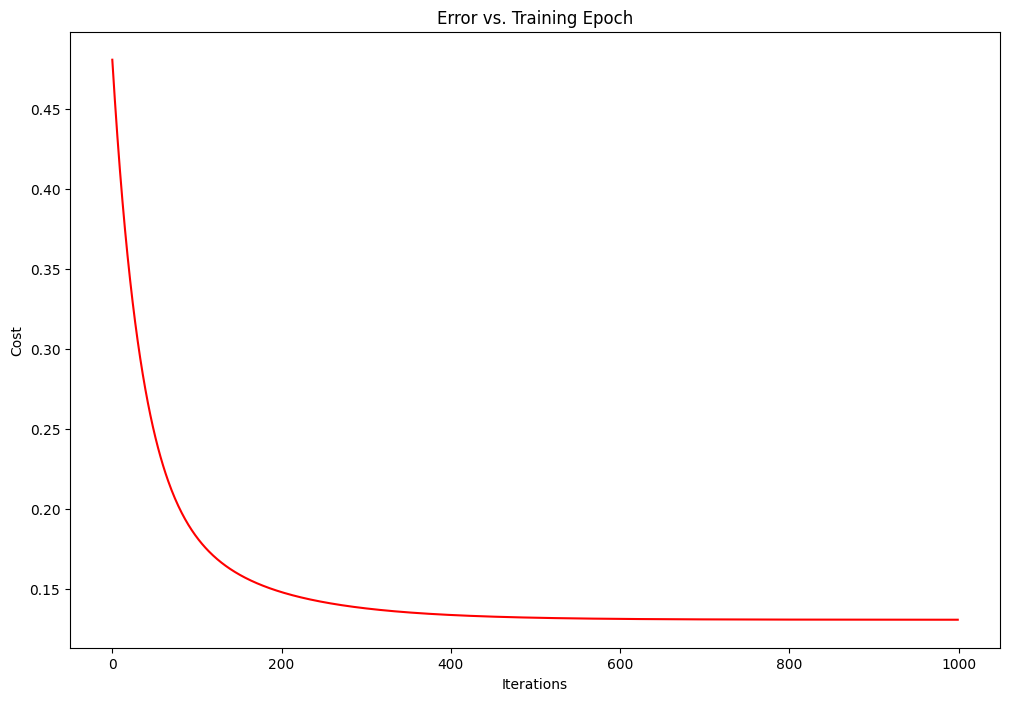

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')